<a href="https://colab.research.google.com/github/MarinaOhm/master_thesis/blob/main/RICE_FORECASTING_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Master thesis
## *Exploratory Data Analysis for Forecasting*
*Developed by Max Hedeman Gueniau, Niklas Madsen, and Marina Ohm*

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import plotly.graph_objects as go
from datetime import datetime
from prettytable import PrettyTable
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import DecomposeResult, seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
import warnings
from statsmodels.tsa.stattools import kpss

# Import data

In [ ]:
full_data1=pd.read_csv('/content/drive/MyDrive/New full dataset with 2023 data 1.csv', sep=';')

<ipython-input-2-e249fa795a78>:2: DtypeWarning: Columns (4,7,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data1=pd.read_csv('/content/drive/MyDrive/New full dataset with 2023 data 1.csv', sep=';')


# Explore data through descriptive statistics

In [ ]:
# Shape of data
print(full_data1.shape)

(3048827, 13)


In [ ]:
# Check for duplicated
boolean = full_data1.duplicated().any() 
boolean

False

In [ ]:
full_data=full_data1.copy()

In [ ]:
# Convert currency
full_data.CURRENCY.unique()

conversions= {'SEK': 0.66, 
              'EUR': 7.45,
              'NOK': 0.68,
                'USD': 7.0,
                'GBP': 8.35,
                'DKK': 1.00,
                'THB':0.2
              }

currency_df=full_data[full_data['date_'] < '2022-05-15']
currency_df['rate'] = currency_df['CURRENCY'].map(conversions) 
currency_df['value'] = currency_df['rate'] * currency_df['sales']

no_currency_change=full_data[full_data['date_'] > '2022-05-15']
no_currency_change["rate"]=1
no_currency_change["value"]=no_currency_change['rate'] * no_currency_change["sales"]

transformed_full_df = currency_df.append(no_currency_change, ignore_index=True)
transformed_full_df.shape 

array([nan, 'DKK', 'EUR', 'USD', 'NOK', 'SEK', 'GBP', 'THB'], dtype=object)

In [ ]:
# Function for extracting summary statistics

def summary_stat(df, col,num_col): 
  """
  Function for summary statistics for a given column

  :parameters:
  - DataFrame
  - Column to examine
  - Value 

  :return:
  - Summary statistics
  """
  nb_price_summary = df.groupby(col)[num_col].describe().reset_index()
  nb_price_summary['IQR'] = nb_price_summary['75%']  - nb_price_summary['25%']

  (
  nb_price_summary
  [[col, 'mean', 'std', '25%', '50%', '75%', 'IQR']].round(1)
  .sort_values(["IQR","mean"], ascending=False)
  )

  return nb_price_summary

In [ ]:
summary_stat(transformed_full_df,"Item Category Code", "value")

,Item Category Code,count,mean,std,min,25%,50%,75%,max,IQR
0,ACCESS,2147.0,397.392069,548.041118,-2384.000,195.84000,384.00000,429.120000,9506.2000,233.280000
1,ACCESSORIE,17025.0,215.780311,339.350550,-2404.800,8.40000,71.52000,384.000000,8416.8000,375.600000
2,BAGS,14909.0,384.019315,524.911685,-6290.130,0.00000,417.20000,500.180000,17212.4800,500.180000
3,BONUS,111.0,-6137.729989,11929.864385,-54712.270,-5235.16275,-2178.15840,-959.909000,21821.3480,4275.253750
4,CERAMIC,39517.0,209.781763,311.626778,-5980.000,0.00000,194.96000,298.000000,8743.4000,298.000000
5,CUSTOMSFEE,9680.0,145.786683,648.766602,-58546.320,157.62250,163.90000,165.000000,16757.1360,7.377500
6,DONATION,2.0,7437.707500,5777.355852,3352.500,5395.10375,7437.70750,9480.311250,11522.9150,4085.207500
7,FEE RICET,10.0,54763.981500,51860.388698,496.915,14614.85125,45630.50500,84489.332500,164494.5100,69874.481250
8,FEES,146.0,6301.396740,18439.276924,-45492.800,0.00000,716.87625,8771.348375,141608.4000,8771.348375
9,FOBCHARGE,22.0,0.000000,285.584640,-925.400,0.00000,0.00000,0.000000,925.4000,0.000000


In [ ]:
# Extract year and month into seperate columns
transformed_full_df['year'] = pd.DatetimeIndex(transformed_full_df['date_']).year
transformed_full_df['month'] = pd.DatetimeIndex(transformed_full_df['date_']).month
transformed_full_df.head()

transformed_full_df['date_'] =  pd.to_datetime(transformed_full_df['date_'])

,_ItemNumber,date_,Q,sales,NUMBER,BDLRI Sales Status,BDLRI Origin,NUMBER_,CURRENCY,Item Category Code,No_,Source Code,Source Type,rate,value,year,month
0,BABCU-2HFARB,2022-03-20 00:00:00.000,0.0,0.0,NaN,YYSS,AW22,NaN,NaN,KIDS,BABCU-2HFARB,KØB,2.0,NaN,NaN,2022,3
1,BABCU-2HFARI,2022-03-20 00:00:00.000,0.0,0.0,NaN,YYSS,AW22,NaN,NaN,KIDS,BABCU-2HFARI,KØB,2.0,NaN,NaN,2022,3
2,BABOX-4ZFARB,2022-03-20 00:00:00.000,0.0,0.0,NaN,YYSS,AW22,NaN,NaN,KIDS,BABOX-4ZFARB,KØB,2.0,NaN,NaN,2022,3
3,BABCU-2HFARB,2022-03-20 00:00:00.000,5184.0,0.0,NaN,YYSS,AW22,NaN,NaN,KIDS,BABCU-2HFARB,OVERFØRSEL,0.0,NaN,NaN,2022,3
4,BABOX-4ZFARI,2022-03-20 00:00:00.000,0.0,0.0,NaN,YYSS,AW22,NaN,NaN,KIDS,BABOX-4ZFARI,KØB,2.0,NaN,NaN,2022,3


In [ ]:
transformed_full_df['MonthYear'] = transformed_full_df['date_'].dt.strftime('%Y-%m')
transformed_full_df.head(1)

,_ItemNumber,date_,Q,sales,NUMBER,BDLRI Sales Status,BDLRI Origin,NUMBER_,CURRENCY,Item Category Code,No_,Source Code,Source Type,rate,value,year,month,MonthYear
0,BABCU-2HFARB,2022-03-20,0.0,0.0,NaN,YYSS,AW22,NaN,NaN,KIDS,BABCU-2HFARB,KØB,2.0,NaN,NaN,2022,3,2022-03


In [ ]:
# Filtering by date, as we don't want any values from December 2022 and onwards (not enough data)

data = transformed_full_df[transformed_full_df['date_'] < '2023-03-31']
data = transformed_full_df.set_index("date_")
data.head(1)

,_ItemNumber,Q,sales,NUMBER,BDLRI Sales Status,BDLRI Origin,NUMBER_,CURRENCY,Item Category Code,No_,Source Code,Source Type,rate,value,year,month,MonthYear
date_,,,,,,,,,,,,,,,,,
2022-03-20,BABCU-2HFARB,0.0,0.0,NaN,YYSS,AW22,NaN,NaN,KIDS,BABCU-2HFARB,KØB,2.0,NaN,NaN,2022,3,2022-03


In [ ]:
def detailed(data):
    """
    Function for extracting additional information for each column in DF

    :parameters:
    - DataFrame

    :return:
    - Statistics
    """

    ddata = pd.DataFrame(index=['total', '% missing' , 'data Type', 'range'])
    
    for cols in data.columns:
        size = data[cols].size
        pnul=round(data[cols].isna().sum()/size,2)
        nul_val = f"{pnul*100}% - {data[cols].isna().sum()}/{size}"
        dtype = 'categorical' if data[cols].dtype == object else 'Numerical' 
        rng = f"{len(data[cols].unique())} labels"\
        if dtype == 'categorical' else\
        f"{round(data[cols].min(),2)}-{round(data[cols].max(),2)}"
        ddata[cols] = [size,nul_val,dtype,rng]
    return ddata

detailed(data)

,_ItemNumber,Q,sales,NUMBER,BDLRI Sales Status,BDLRI Origin,NUMBER_,CURRENCY,Item Category Code,No_,Source Code,Source Type,rate,value,year,month,MonthYear
total,3048827,3048827,3048827,3048827,3048827,3048827,3048827,3048827,3048827,3048827,3048827,3048827,3048827,3048827,3048827,3048827,3048827
% missing,0.0% - 0/3048827,0.0% - 0/3048827,0.0% - 0/3048827,14.000000000000002% - 411637/3048827,60.0% - 1830859/3048827,60.0% - 1830948/3048827,14.000000000000002% - 416932/3048827,14.000000000000002% - 416932/3048827,57.99999999999999% - 1765293/3048827,56.99999999999999% - 1743740/3048827,87.0% - 2638614/3048827,86.0% - 2637190/3048827,0.0% - 5331/3048827,0.0% - 5331/3048827,0.0% - 0/3048827,0.0% - 0/3048827,0.0% - 0/3048827
data Type,categorical,Numerical,Numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,Numerical,Numerical,Numerical,Numerical,Numerical,categorical
range,13239 labels,-6882.0-55440.0,-500000.0-708042.0,190010 labels,11 labels,68 labels,189835 labels,8 labels,35 labels,3767 labels,8 labels,0.0-2.0,0.2-8.35,-500000.0-500000.0,2011-2023,1-12,147 labels


In [ ]:
# Removing Riceteria from the data
data=data[data["BDLRI Origin"]!="RICETDK"]
data=data[data["Item Category Code"]!="RICELIFE"]

data=data.reset_index()

In [ ]:
# Explore unique products sales status
pd.pivot_table(data, index='BDLRI Sales Status', values=['_ItemNumber'], aggfunc=lambda x: len(x.unique()))

,_ItemNumber
BDLRI Sales Status,
0000,223
FFFF,235
RICET,205
SPEC,37
SSSS,127
SSSS-BLOCK,100
WEB,428
XXXX,1297
YYSS,627


In [ ]:
# Remove observations that are not products
remove_item_categories=['ACCESS','FEES','FRAGT EU','FRAGT IEU','FREIGHT DK','INVOICE FEE','KONVETERINGSFEJL','KONVERTERINGSFEJL',
                        'LABELS','MARKETING','ROYALTY','SAMLPES','STOCKSALE','CUSTOMSFEE','SAMPLES','BONUS','FRAGT DKK', 'DONATION',
                        'FEE RICET','FOBCHARGE','GRAPHICS','TRAINING']

data = data[~data["Item Category Code"].isin(remove_item_categories)]

In [ ]:
# Unique products per sales status 
pd.pivot_table(data, index='BDLRI Sales Status', values=['_ItemNumber'], aggfunc=lambda x: len(x.unique()))

,_ItemNumber
BDLRI Sales Status,
0000,222
FFFF,234
RICET,204
SPEC,16
SSSS,95
SSSS-BLOCK,100
WEB,428
XXXX,1267
YYSS,626


In [ ]:
# Unique products per category 
pd.pivot_table(data, index='Item Category Code', values=['_ItemNumber'], aggfunc=lambda x: len(x.unique()))

,_ItemNumber
Item Category Code,
ACCESSORIE,68
BAGS,79
CERAMIC,95
HOME,458
KIDS,312
KIDS ROOM,36
KIDS TABLE,77
KITCHEN,514
MELAMINE,28


In [ ]:
# Extracting sales data 
sales_data=data.copy()
sales_data=sales_data[sales_data["Source Type"]!=2]
sales_data=sales_data[sales_data["Source Type"]!=0]
sales_data=sales_data[sales_data["Q"]!=0]
sales_data

,date_,_ItemNumber,Q,sales,NUMBER,BDLRI Sales Status,BDLRI Origin,NUMBER_,CURRENCY,Item Category Code,No_,Source Code,Source Type,rate,value,year,month,MonthYear
152,2016-10-04,,1.0,5169.00,183682,NaN,NaN,183682,USD,NaN,NaN,NaN,NaN,7.00,36183.00,2016,10,2016-10
153,2016-10-27,,1.0,180.00,184655,NaN,NaN,184655,EUR,NaN,NaN,NaN,NaN,7.45,1341.00,2016,10,2016-10
154,2016-10-28,,1.0,551.63,184686,NaN,NaN,184686,USD,NaN,NaN,NaN,NaN,7.00,3861.41,2016,10,2016-10
156,2017-06-13,,1.0,-2345.91,192484,NaN,NaN,192484,USD,NaN,NaN,NaN,NaN,7.00,-16421.37,2017,6,2017-06
157,2017-07-05,,1.0,-6035.73,193410,NaN,NaN,193410,USD,NaN,NaN,NaN,NaN,7.00,-42250.11,2017,7,2017-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3041203,2022-06-08,XMECP-AW20PO,1.0,4.88,1039481,XXXX,AW20,1039481,EUR,XMAS,XMECP-AW20PO,NaN,NaN,1.00,4.88,2022,6,2022-06
3041204,2022-06-08,XMECP-AW20PO,6.0,29.25,1039518,XXXX,AW20,1039518,EUR,XMAS,XMECP-AW20PO,NaN,NaN,1.00,29.25,2022,6,2022-06
3041248,2022-06-01,XMECU-AW21B,24.0,172.80,502210,XXXX,AW21,502210,NOK,XMAS,XMECU-AW21B,NaN,NaN,1.00,172.80,2022,6,2022-06
3041249,2022-06-07,XMECU-AW21G,24.0,172.80,315770,XXXX,AW21,315770,SEK,XMAS,XMECU-AW21G,NaN,NaN,1.00,172.80,2022,6,2022-06


In [ ]:
# Ensuring that there is no data from C5 that aren't sales.
sales_data[sales_data["Q"]<0]

# BUT we are only extracting sales from C5, so it might be returns.. Do not remove them yet 

,date_,_ItemNumber,Q,sales,NUMBER,BDLRI Sales Status,BDLRI Origin,NUMBER_,CURRENCY,Item Category Code,No_,Source Code,Source Type,rate,value,year,month,MonthYear
161,2017-08-07,,-1.0,3529.80,194391,NaN,NaN,194391,USD,NaN,NaN,NaN,NaN,7.00,24708.600,2017,8,2017-08
188,2018-12-19,,-1.0,-45000.00,210601,NaN,NaN,210601,DKK,NaN,NaN,NaN,NaN,1.00,-45000.000,2018,12,2018-12
300,2011-07-12,AIRFR-FLAXC,-5.0,-2.50,73015,NaN,NaN,73015,GBP,NaN,NaN,NaN,NaN,8.35,-20.875,2011,7,2011-07
440,2013-01-10,AIRFR-FLAXC,-72.0,-36.00,137431,NaN,NaN,137431,GBP,NaN,NaN,NaN,NaN,8.35,-300.600,2013,1,2013-01
467,2019-07-16,AIRFR-LEMG,-2.0,-12.00,216216,NaN,NaN,216216,EUR,NaN,NaN,NaN,NaN,7.45,-89.400,2019,7,2019-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040488,2022-05-19,PLBOT-SFRO,-11.0,-52.80,237659,0000,SS22,237659,EUR,KITCHEN,PLBOT-SFRO,NaN,NaN,1.00,-52.800,2022,5,2022-05
3040500,2022-05-24,PLBOT-SSWA,-3.0,-14.40,237764,0000,SS22,237764,EUR,KITCHEN,PLBOT-SSWA,NaN,NaN,1.00,-14.400,2022,5,2022-05
3041022,2022-05-20,SUPAR-TILAP,-1.0,-150.00,237695,NaN,NaN,237695,EUR,NaN,NaN,NaN,NaN,1.00,-150.000,2022,5,2022-05
3041048,2022-05-17,THERMO-BIDMI,-1.0,-14.00,237604,FFFF,SS20,237604,EUR,KITCHEN,THERMO-BIDMI,NaN,NaN,1.00,-14.000,2022,5,2022-05


# EDA for overall product portfolio

In [ ]:
# Defining color palette

color_palette = [
    'rgba(41, 57, 71, 1)',
    'rgba(128, 128, 128, 1)',
    'rgba(93, 112, 127, 1)',
    'rgba(155, 170, 181, 1)',
    'rgba(80, 177, 200, 100)','rgba(154, 177, 197, 100)',
    'rgba(133, 173, 219, 100)','rgba(28, 59, 95, 100)',
    'rgba(40, 109, 125, 100)','rgba(23, 63, 73, 100)',
    'rgba(70, 115, 171, 100)'

]


In [ ]:
def assign_colors(unique_values, palette):
    """
    Function for assigning colors

    :parameters:
    - Values to map
    - Color palette

    :return:
    - Color mapping
    """
    color_mapping = {}
    num_colors = len(palette)

    for idx, value in enumerate(unique_values):
        color_mapping[value] = palette[idx % num_colors]

    return color_mapping


## Time series plot of overall daily sales

In [ ]:
plot=sales_data.copy()
daily_sales = plot.groupby('date_', as_index=False)['value'].sum()
category_daily_sales = plot.groupby(['Item Category Code', 'date_'], as_index=False)['value'].sum()

In [ ]:
daily_sales_sc = go.Scatter(x=daily_sales['date_'], y=daily_sales['value'])
layout = go.Layout(title='Daily sales', xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[daily_sales_sc], layout=layout)
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_layout(yaxis_title="Value")
fig.update_traces(texttemplate= '%{text:.3s}')
fig.update_layout(title_text="Total daily sales on full product portfolio", title_x=0.5)
fig.show()

## Bar chart over total sales by year

In [ ]:
color_palette = [
    'rgba(41, 57, 71, 1)',
    'rgba(128, 128, 128, 1)',
    'rgba(93, 112, 127, 1)',
    'rgba(155, 170, 181, 1)',
    'rgba(80, 177, 200, 100)','rgba(154, 177, 197, 100)',
    'rgba(133, 173, 219, 100)','rgba(28, 59, 95, 100)',
    'rgba(40, 109, 125, 100)','rgba(23, 63, 73, 100)',
    'rgba(70, 115, 171, 100)'
]

year_df = sales_data.groupby(sales_data.date_.dt.year)['value'].sum().to_frame()

trace = go.Bar(
    y=year_df.value, x=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
    marker=dict(color=color_palette),
    name='Total sales by year', orientation='v'
)

layout = go.Layout(autosize=True, title='Total sales by year', showlegend=True)
fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(title_x=0.5, plot_bgcolor='rgba(0,0,0,0)')

fig.show()


## Time series plot over average monthly sales by category and sales status 



In [ ]:
# Group the data by 'BDLRI Sales Status' and 'date_weekly', summing the 'Q' column
status_daily_sales = sales_data.groupby(['BDLRI Sales Status', 'MonthYear'], as_index=False)['value'].sum()

# Create a scatter plot for each unique 'BDLRI Sales Status'
status_daily_sales_sc = []
for status in status_daily_sales['BDLRI Sales Status'].unique():
    current_status_daily_sales = status_daily_sales[(status_daily_sales['BDLRI Sales Status'] == status)]
    status_daily_sales_sc.append(go.Scatter(x=current_status_daily_sales['MonthYear'], y=current_status_daily_sales['value'], name=('Status: %s' % status)))

# Set up the layout and create the figure
layout = go.Layout(title='Monthly sales by BDLRI Sales Status', title_x=0.5, xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=status_daily_sales_sc, layout=layout)

# Customize the background color and display the figure
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.show()

## Time series plot over monthly sales by item category code

In [ ]:
# Group the data by 'BDLRI Sales Status' and 'date_weekly', summing the 'Q' column
status_daily_sales = sales_data.groupby(['Item Category Code', 'MonthYear'], as_index=False)['value'].sum()

# Create a scatter plot for each unique 'BDLRI Sales Status'
status_daily_sales_sc = []

# Assign colors to each unique 'Item Category Code'
unique_item_categories = status_daily_sales['Item Category Code'].unique()
color_mapping = assign_colors(unique_item_categories, color_palette)

for status in unique_item_categories:
    current_status_daily_sales = status_daily_sales[(status_daily_sales['Item Category Code'] == status)]
    status_daily_sales_sc.append(go.Scatter(x=current_status_daily_sales['MonthYear'], y=current_status_daily_sales['value'],
                                            name=('Status: %s' % status), line=dict(color=color_mapping[status])))

# Set up the layout and create the figure
layout = go.Layout(title='Monthly sales by Item Category Code', title_x=0.5, xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=status_daily_sales_sc, layout=layout)

# Customize the background color and display the figure
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.show()


## Time series plot over monthly sales by item category code (2020-2022)

In [ ]:
# Filter data to include only 2020, 2021, and 2022
sales_data_filtered = sales_data[sales_data['date_'].dt.year.isin([2020, 2021, 2022])]

# Group the data by 'Item Category Code' and 'MonthYear', summing the 'value' column
status_daily_sales = sales_data_filtered.groupby(['Item Category Code', 'MonthYear'], as_index=False)['value'].sum()

# Create a scatter plot for each unique 'Item Category Code'
status_daily_sales_sc = []

# Assign colors to each unique 'Item Category Code'
unique_item_categories = status_daily_sales['Item Category Code'].unique()
color_mapping = assign_colors(unique_item_categories, color_palette)

for status in unique_item_categories:
    current_status_daily_sales = status_daily_sales[(status_daily_sales['Item Category Code'] == status)]
    status_daily_sales_sc.append(go.Scatter(x=current_status_daily_sales['MonthYear'], y=current_status_daily_sales['value'],
                                            name=('Status: %s' % status), line=dict(color=color_mapping[status])))

# Set up the layout and create the figure
layout = go.Layout(title='Monthly sales by Item Category Code (2020-2022)', title_x=0.5, xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=status_daily_sales_sc, layout=layout)

# Customize the background color and display the figure
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.show()


## Time series plot over monthly orders and monthly sales made (Q)

In [ ]:
count_orders= sales_data.groupby('MonthYear').count()['Q']

x = count_orders.reset_index()['MonthYear'].astype('str').values.tolist()
y = count_orders.reset_index()['Q'].values.tolist()
trendfig = go.Figure()
trendfig.add_trace(go.Scatter(x=x, y=y, name='Total Sales'))
trendfig.update_layout(title='Number of orders made each month', title_x=0.5, xaxis_title='Date', yaxis_title='Sales(M)')
trendfig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

trendfig.show()

In [ ]:
total_sales_month= sales_data.groupby('MonthYear').sum()['Q']

<ipython-input-39-15ddd1630aec>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
total_value_month= sales_data.groupby('MonthYear').sum()['value']

<ipython-input-41-05f3ca5e21c7>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
x = total_value_month.reset_index()['MonthYear'].astype('str').values.tolist()
y = total_value_month.reset_index()['value'].values.tolist()
trendfig = go.Figure()
trendfig.add_trace(go.Scatter(x=x, y=y, name='Total value'))
trendfig.update_layout(title='Monthly sales', title_x=0.5, xaxis_title='Date', yaxis_title='Value(M)')
trendfig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

trendfig.show()

In [ ]:
color_palette = [
    'rgba(41, 57, 71, 1)',
    'rgba(128, 128, 128, 1)',
    'rgba(93, 112, 127, 1)',
    'rgba(155, 170, 181, 1)',
    'rgba(80, 177, 200, 100)','rgba(154, 177, 197, 100)',
    'rgba(133, 173, 219, 100)','rgba(28, 59, 95, 100)',
    'rgba(40, 109, 125, 100)','rgba(23, 63, 73, 100)',
    'rgba(70, 115, 171, 100)'

]


# Functions for EDA

## Decomposition



In [ ]:
def plot_seasonal_decompose(result:DecomposeResult, dates:pd.Series=None, title:str='Seasonal Decomposition on full time series'):
    unique_values = ['Observed', 'Trend', 'Seasonal', 'Residual']
    color_palette = [
    'rgba(41, 57, 71, 1)',
    'rgba(92, 112, 126, 1)',
    'rgba(28, 59, 95, 1)',
    'rgba(40, 109, 125, 1)']
    color_mapping = assign_colors(unique_values, color_palette)
    x_values = dates if dates is not None else np.arange(len(result.observed))
    return (
        make_subplots(
            rows=4,
            cols=1,
            subplot_titles=["Observed", "Trend", "Seasonal", "Residuals"],
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.observed, mode="lines", name='Observed',line=dict(color=color_mapping['Observed'])),
            row=1,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.trend, mode="lines", name='Trend',line=dict(color=color_mapping['Trend'])),
            row=2,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.seasonal, mode="lines", name='Seasonal',line=dict(color=color_mapping['Seasonal'])),
            row=3,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.resid, mode="lines", name='Residual',line=dict(color=color_mapping['Residual'])),
            row=4,
            col=1,
        )
        .update_layout(
            height=900, title=title, margin={'t':100}, title_x=0.5, showlegend=False
        ).update_layout(plot_bgcolor='rgba(0,0,0,0)')
    )

In [ ]:
def plot_seasonal_decompose_sku_category(df: pd.DataFrame, column: str,period:int) -> go.Figure:
    """
    Decomposes a time series into its trend, seasonal, and residual components
    and plots the results in a subplot.

    :parameters:
    - DataFrame
    - Column to be examined
    - Title

    :return:
    - A Plotly figure showing the decomposition results
    """
    #df=df.reset_index()
    while True:
        item_number = df[column].sample().iloc[0]
        item_data = df.loc[df[column] == item_number][["date_weekly", "Q"]]
        item_data = item_data.groupby('date_weekly')["Q"].sum()
        item_data = item_data.reset_index()
        item_data = item_data[item_data["Q"] > 0]
        item_data.set_index('date_weekly', inplace=True)

        # Check if the length is at least 104 observations
        if len(item_data) >= 104:
            break

    item_data.dropna(inplace=True)

    # Perform seasonal decomposition
    decomposition = seasonal_decompose(item_data, model='additive',period=period)
    unique_values = ['Observed', 'Trend', 'Seasonal', 'Residual']

    color_palette = [
    'rgba(41, 57, 71, 1)',
    'rgba(92, 112, 126, 1)',
    'rgba(28, 59, 95, 1)',
    'rgba(40, 109, 125, 1)']
    color_mapping = assign_colors(unique_values, color_palette)
    x_values = item_data.index
    return (
        make_subplots(
            rows=4,
            cols=1,
            subplot_titles=["Observed", "Trend", "Seasonal", "Residuals"],
        )
        .add_trace(
            go.Scatter(x=x_values, y=decomposition.observed, mode="lines", name='Observed',line=dict(color=color_mapping['Observed'])),
            row=1,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=decomposition.trend, mode="lines", name='Trend',line=dict(color=color_mapping['Trend'])),
            row=2,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=decomposition.seasonal, mode="lines", name='Seasonal',line=dict(color=color_mapping['Seasonal'])),
            row=3,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=decomposition.resid, mode="lines", name='Residual',line=dict(color=color_mapping['Residual'])),
            row=4,
            col=1,
        )
        .update_layout(
            height=900,title=f"Decomposition plot of {column}: {item_number}", margin={'t':100}, title_x=0.5, showlegend=False
        ).update_layout(plot_bgcolor='rgba(0,0,0,0)')
    )


    # Update the layout
    fig.update_layout(title=f"Decomposition plot of {column}: {item_number}", title_x=0.5)
    fig.update_layout(height=900, margin={'t': 100}, plot_bgcolor='rgba(0,0,0,0)', showlegend=False)

    return fig

## Stationarity

It is  important to note that the ADF test assumes that the time series is stationary around a deterministic trend, while the KPSS test assumes that the time series is stationary around a stochastic trend. Therefore, it is possible to obtain conflicting results from the two tests

In [ ]:
def save_stationarity_results(df, date_col, sku_col, sales_col):
    unique_skus = df[sku_col].unique()

    # create new dataframe to store results
    stationarity_df = pd.DataFrame(columns=[sku_col, 'ADF_score', 'p_value_ADF', 'KPSS_score', 'p_value_KPSS', 'stationarity'])

    # perform ADF and KPSS tests on sku data for each SKU
    for sku in unique_skus:
        sku_data = df.loc[df[sku_col] == sku, [date_col, sales_col]]

        # perform ADF test on sku data
        adf_test = sku_data.set_index(date_col)
        adf_result = adfuller(adf_test[sales_col], autolag='AIC')

        # perform KPSS test on sku data
        kpss_result = kpss(adf_test[sales_col], regression='c')

        # check if time series is stationary
        if adf_result[0] < adf_result[4]["5%"] and kpss_result[0] < kpss_result[3]["5%"]:
            stationarity = 'Stationary'
        else:
            stationarity = 'Non-Stationary'
          
        # save results to dataframe
        stationarity_df = stationarity_df.append({sku_col: sku, 
                                                  'ADF_score': adf_result[0], 
                                                  'p_value_ADF': adf_result[1], 
                                                  'KPSS_score': kpss_result[0], 
                                                  'p_value_KPSS': kpss_result[1],
                                                  'stationarity': stationarity}, ignore_index=True)

    return stationarity_df



In [ ]:
def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')


In [ ]:
def kpss_func(X):
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings("error")
            result_kpss = kpss(X)

            print('KPSS Statistic: %f' % result_kpss[0])
            print('p-value: %f' % result_kpss[1])
            print('Critical Values:')
            for key, value in result_kpss[3].items():
                print('\t%s: %.3f' % (key, value))

            if result_kpss[0] > result_kpss[3]['5%']:
                print('Reject Null Hypothesis(H0) - Time Series is Non-Stationary')
            else:
                print('Failed to Reject H0 - Time Series is Stationary')
    
    except Warning as e:
        print("The test statistic is outside the range of p-values available in the look-up table.")
        print("The actual p-value is smaller than the p-value returned.")
        print("This might indicate a strong non-stationarity in the time series.")


## Autocorrelation

In [ ]:
def plot_autocorrelation(data, lags, title):
    acf_vals, confint = acf(data, nlags=lags, alpha=0.05, fft=True, missing='none')

    x_vals = np.arange(lags + 1)
    y_vals = acf_vals
    confint = confint[:, 1] - y_vals

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode="lines+markers", name="Autocorrelation"))
    fig.add_trace(go.Scatter(x=x_vals, y=confint, mode="lines", name="Confidence Interval", line=dict(color="gray")))

    fig.update_layout(title=title, xaxis_title="Lag", yaxis_title="Autocorrelation", title_x=0.5)
    fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

    return fig

In [ ]:
def autocorrelation_plot(df,lags:int):
  df=df.reset_index()

  # Set the maximum lag to plot for the ACF and PACF
  max_lag = lags
  df.set_index('date_weekly', inplace=True)
  # Calculate the autocorrelation function (ACF) and partial autocorrelation function (PACF)
  acf_vals = acf(df['Q'], nlags=max_lag, alpha=0.5)
  pacf_vals = pacf(df['Q'], nlags=max_lag, alpha=0.5)

  # Create a subplot with the ACF and PACF plots side by side
  fig = make_subplots(rows=1, cols=2, subplot_titles=('Autocorrelation Function (ACF)', 'Partial Autocorrelation Function (PACF)'))

  # Add ACF plot
  fig.add_trace(go.Scatter(x=list(range(len(acf_vals[0]))), y=acf_vals[0], mode="lines+markers", name='ACF'), row=1, col=1)
  fig.add_shape(type='line', x0=0, x1=lags, y0=0, y1=0, yref='y', xref='x', line=dict(color='gray'), row=1, col=1)
  fig.add_shape(type='line', x0=0, x1=max_lag, y0=acf_vals[1][0], y1=acf_vals[1][0], yref='y', xref='x', line=dict(color='gray'), row=1, col=1)
  fig.add_shape(type='line', x0=0, x1=max_lag, y0=acf_vals[1][1], y1=acf_vals[1][1], yref='y', xref='x', line=dict(color='gray'), row=1, col=1)

  # Add PACF plot
  fig.add_trace(go.Scatter(x=list(range(len(pacf_vals[0]))), y=pacf_vals[0],mode="lines+markers", name='PACF'), row=1, col=2)
  fig.add_shape(type='line', x0=0, x1=lags, y0=0, y1=0, yref='y2', xref='x2', line=dict(color='gray'), row=1, col=2)
  fig.add_shape(type='line', x0=0, x1=max_lag, y0=pacf_vals[1][0], y1=pacf_vals[1][0], yref='y2', xref='x2', line=dict(color='gray'), row=1, col=2)
  fig.add_shape(type='line', x0=0, x1=max_lag, y0=pacf_vals[1][1], y1=pacf_vals[1][1], yref='y2', xref='x2', line=dict(color='gray'), row=1, col=2)

  # Update layout
  fig.update_layout(
      title='ACF and PACF Plots',title_x=0.5,
      yaxis_title='Correlation',
      xaxis_title='Lag',
      xaxis2_title='Lag',
      margin=dict(l=100, r=100)
  )
  fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

  # Show the plots in the notebook
  fig.show()

In [ ]:
def autocorrelation_plot(df, lags: int):
    # Check if the index needs to be reset
    df = df.reset_index()
    df.set_index('date_weekly', inplace=True)

    # Calculate ACF and PACF
    acf_vals = acf(df['Q'], nlags=lags)
    pacf_vals = pacf(df['Q'], nlags=lags)

    # Create the ACF and PACF plots
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # ACF plot
    axs[0].stem(acf_vals, use_line_collection=True, linefmt='midnightblue', markerfmt='o', basefmt='gray')
    axs[0].axhline(y=0, linestyle='--', color='gray')
    axs[0].axhline(y=-1.96/np.sqrt(len(df['Q'])), linestyle='--', color='gray')
    axs[0].axhline(y=1.96/np.sqrt(len(df['Q'])), linestyle='--', color='gray')
    axs[0].set_xlabel('Lags')
    axs[0].set_ylabel('ACF')
    axs[0].set_title(f'Autocorrelation plot')

    # PACF plot
    axs[1].stem(pacf_vals, use_line_collection=True, linefmt='teal', markerfmt='o', basefmt='gray')
    axs[1].axhline(y=0, linestyle='--', color='gray')
    axs[1].axhline(y=-1.96/np.sqrt(len(df['Q'])), linestyle='--', color='gray')
    axs[1].axhline(y=1.96/np.sqrt(len(df['Q'])), linestyle='--', color='gray')
    axs[1].set_xlabel('Lags')
    axs[1].set_ylabel('PACF')
    axs[1].set_title(f'Partial Autocorrelation plot')

    # Set titles for both subplots
   # ax1.set_title('Autocorrelation (ACF)')
    #ax2.set_title('Partial Autocorrelation (PACF)')

    # Show the plots
    plt.tight_layout()
    plt.show()


In [ ]:
def autocorrelation_plot_by_sku(df, column, n_plots=4, lags=50):
    # Get a list of unique SKUs to plot
    skus = df[column].unique()
    skus_to_plot = np.random.choice(skus, size=n_plots, replace=False)

    # Loop over the SKUs to plot and create an ACF/PACF plot for each one
    for sku in skus_to_plot:
        sku_data = df.loc[df[column] == sku].set_index('date_weekly')['Q']

        # Calculate the autocorrelation function (ACF) and partial autocorrelation function (PACF)
        acf_vals = acf(sku_data, nlags=lags, alpha=0.5)
        pacf_vals = pacf(sku_data, nlags=lags, alpha=0.5)

        # Create a subplot with the ACF and PACF plots side by side
        fig = make_subplots(rows=1, cols=2, subplot_titles=('Autocorrelation Function (ACF)', 'Partial Autocorrelation Function (PACF)'))

        # Add ACF plot
        fig.add_trace(go.Scatter(x=list(range(len(acf_vals[0]))), y=acf_vals[0], mode="lines+markers", name='ACF'), row=1, col=1)
        fig.add_shape(type='line', x0=0, x1=lags, y0=0, y1=0, yref='y', xref='x', line=dict(color='gray'), row=1, col=1)
        fig.add_shape(type='line', x0=0, x1=lags, y0=acf_vals[1][0], y1=acf_vals[1][0], yref='y', xref='x', line=dict(color='gray'), row=1, col=1)
        fig.add_shape(type='line', x0=0, x1=lags, y0=acf_vals[1][1], y1=acf_vals[1][1], yref='y', xref='x', line=dict(color='gray'), row=1, col=1)

        # Add PACF plot
        fig.add_trace(go.Scatter(x=list(range(len(pacf_vals[0]))), y=pacf_vals[0],mode="lines+markers", name='PACF'), row=1, col=2)
        fig.add_shape(type='line', x0=0, x1=lags, y0=0, y1=0, yref='y2', xref='x2', line=dict(color='gray'), row=1, col=2)
        fig.add_shape(type='line', x0=0, x1=lags, y0=pacf_vals[1][0], y1=pacf_vals[1][0], yref='y2', xref='x2', line=dict(color='gray'), row=1, col=2)
        fig.add_shape(type='line', x0=0, x1=lags, y0=pacf_vals[1][1], y1=pacf_vals[1][1], yref='y2', xref='x2', line=dict(color='gray'), row=1, col=2)

        # Update layout
        fig.update_layout(
            title=f'ACF and PACF Plots for SKU {sku}',title_x=0.5,
            yaxis_title='Correlation',
            xaxis_title='Lag',
            xaxis2_title='Lag',
            margin=dict(l=100, r=100)
        )
        fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

        fig.show()


In [ ]:
def autocorrelation_plot_by_category(df, column, lags, n_plots=4):
    # Get a list of unique categories / SKUs
    #df = df.reset_index()
    df = df.set_index("date_weekly")
    categories = df[column].unique()
    skus_to_plot = np.random.choice(categories, size=n_plots, replace=False)

    # Loop over each category and create a separate ACF and PACF plot
    for category in skus_to_plot:
        # Create a subset of the data for the current category
        subset = df[df[column] == category]

        # Calculate ACF and PACF
        acf_vals = acf(subset['Q'], nlags=lags)
        pacf_vals = pacf(subset['Q'], nlags=lags)

        # Create the ACF and PACF plots
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

        # ACF plot
        axs[0].stem(acf_vals, use_line_collection=True, linefmt='midnightblue', markerfmt='o', basefmt='gray')
        axs[0].axhline(y=0, linestyle='--', color='gray')
        axs[0].axhline(y=-1.96/np.sqrt(len(subset['Q'])), linestyle='--', color='gray')
        axs[0].axhline(y=1.96/np.sqrt(len(subset['Q'])), linestyle='--', color='gray')
        axs[0].set_xlabel('Lags')
        axs[0].set_ylabel('ACF')
        axs[0].set_title(f'Autocorrelation plot for {category}')

        # PACF plot
        axs[1].stem(pacf_vals, use_line_collection=True, linefmt='teal', markerfmt='o', basefmt='gray')
        axs[1].axhline(y=0, linestyle='--', color='gray')
        axs[1].axhline(y=-1.96/np.sqrt(len(subset['Q'])), linestyle='--', color='gray')
        axs[1].axhline(y=1.96/np.sqrt(len(subset['Q'])), linestyle='--', color='gray')
        axs[1].set_xlabel('Lags')
        axs[1].set_ylabel('PACF')
        axs[1].set_title(f'Partial autocorrelation plot for {category}')

        plt.show()


## Plotting multiple skus / categories

In [ ]:
def plot_multiple_skus(df, date_col, sku_col, sales_col,title_input):
    # randomly select 4 unique SKUs from original dataframe
    unique_skus = df[sku_col].unique()
    skus_to_plot = np.random.choice(unique_skus, size=4, replace=False)

    # create new dataframe with only necessary columns for the plot function
    df_plot = df.loc[df[sku_col].isin(skus_to_plot), [date_col, sku_col, sales_col]]
    color_palette = [
    'rgba(41, 57, 71, 1)',
    'rgba(92, 112, 126, 1)',
    'rgba(28, 59, 95, 1)',
    'rgba(40, 109, 125, 1)']
    color_mapping = assign_colors(skus_to_plot, color_palette)
    subplot_titles = [f"{sku}" for sku in skus_to_plot]
    fig = make_subplots(rows=2, cols=2,subplot_titles=subplot_titles)

    for i, sku in enumerate(skus_to_plot):
        # read in data for sku
        sku_data = df_plot.loc[df_plot[sku_col] == sku]
        sku_data = sku_data.groupby([sku_col, date_col])[sales_col].sum().reset_index()

        # add trace to subplot
        row = i // 2 + 1
        col = i % 2 + 1
        fig.add_trace(
            go.Scatter(x=sku_data[date_col], y=sku_data[sales_col], name=f"{sku}",line=dict(color=color_mapping[sku]),showlegend=False),
            row=row, col=col
        )

        # perform ADF test on sku data
        adf_test = sku_data.set_index(date_col)
        result = adfuller(adf_test[sales_col], autolag='AIC')
        print("----------------------------------------")
        print(f"ADF Test for: {sku}")
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))
        if result[0] < result[4]["5%"]:
            print ("Reject Ho - Time Series is Stationary")
        else:
            print ("Failed to Reject Ho - Time Series is Non-Stationary")

    # update layout
    fig.update_layout(title=title_input, title_x=0.5, xaxis_title='', yaxis_title='Quantity (Week)', plot_bgcolor='rgba(0,0,0,0)')    
    #fig.update_layout(height=1000, width=1200)

    fig.update_yaxes(tickformat=",.0s", row=1, col=1)
    fig.update_yaxes(tickformat=",.0s", row=1, col=2)
    fig.update_yaxes(title_text="Quantity (Week)", tickformat=",.0s", row=2, col=1)
    fig.update_yaxes(tickformat=",.0s", row=2, col=2)

    #fig.update_yaxes(title_text="Quantity (Week)", row=2, col=1)

    #fig.update_layout(height=1000, width=1200)
    fig.show()


In [ ]:
color_palette[8]

'rgba(40, 109, 125, 100)'

## Only show non stationary 

In [ ]:
def plot_non_stationary_skus(df, date_col, sku_col, sales_col, title_input):
    unique_skus = df[sku_col].unique()
    df_plot = df[[date_col, sku_col, sales_col]]

    subplot_titles = [f"{sku_col}" for sku in unique_skus]
    fig = make_subplots(rows=2, cols=2)

    non_stationary_skus = []
    non_stationary_count = 0
    subplot_titles = []

    while non_stationary_count < 4:
        # randomly select 1 SKU from unique_skus
        sku = np.random.choice(unique_skus, replace=False)
        unique_skus = np.setdiff1d(unique_skus, [sku])  # remove the selected SKU from unique_skus

        # read in data for sku
        sku_data = df_plot.loc[df_plot[sku_col] == sku]
        sku_data = sku_data.groupby([sku_col, date_col])[sales_col].sum().reset_index()
        color_palette = [
        'rgba(41, 57, 71, 1)',
        'rgba(92, 112, 126, 1)',
        'rgba(28, 59, 95, 1)',
        'rgba(40, 109, 125, 1)']
        # perform ADF test on sku data
        adf_test = sku_data.set_index(date_col)
        result = adfuller(adf_test[sales_col], autolag='AIC')
        print("----------------------------------------")
        print(f"ADF Test for: {sku}")
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))
        if result[0] < result[4]["5%"]:
            print("Reject Ho - Time Series is Stationary")
        else:
            print("Failed to Reject Ho - Time Series is Non-Stationary")
            non_stationary_skus.append(sku)
            non_stationary_count += 1

            # Add subtitle to subplot_titles
            subplot_titles.append(f"{sku}")
    
    
    fig = make_subplots(rows=2, cols=2, subplot_titles=subplot_titles)

    color_mapping = assign_colors(non_stationary_skus, color_palette)

    for i, sku in enumerate(non_stationary_skus):
        sku_data = df_plot.loc[df_plot[sku_col] == sku]
        sku_data = sku_data.groupby([sku_col, date_col])[sales_col].sum().reset_index()

        row = i // 2 + 1
        col = i % 2 + 1
        fig.add_trace(
            go.Scatter(x=sku_data[date_col], y=sku_data[sales_col], name=f"{sku}",
                      line=dict(color=color_mapping[sku]), showlegend=False),
            row=row, col=col
        )

    # update layout
    fig.update_layout(title=title_input, title_x=0.5, xaxis_title='Date', yaxis_title='Quantity (Week)', plot_bgcolor='rgba(0,0,0,0)')
    fig.update_yaxes(tickformat=",.0s", row=1, col=1)
    fig.update_yaxes(tickformat=",.0s", row=1, col=2)
    fig.update_yaxes(title_text="Quantity (Week)", tickformat=",.0s", row=2, col=1)
    fig.update_yaxes(tickformat=",.0s", row=2, col=2)

    if non_stationary_skus:
        print("The following SKUs have non-stationary time series:")
        for sku in non_stationary_skus:
            print(sku)
        fig.show()
    else:
        print("No SKUs have non-stationary time series.")


In [ ]:
sales_data["BDLRI Sales Status"].value_counts()

XXXX          321501
FFFF          255883
YYSS          255368
0000           81432
YYYY           42043
WEB            28199
SSSS            2991
SPEC            2491
RICET            812
SSSS-BLOCK       375
Name: BDLRI Sales Status, dtype: int64

# EDA on NOOS portfolio

In [ ]:
ffff_data=sales_data[sales_data["BDLRI Sales Status"]=="FFFF"]
ffff_data["BDLRI Sales Status"].value_counts()

FFFF    255883
Name: BDLRI Sales Status, dtype: int64

In [ ]:
ffff_data[ffff_data["_ItemNumber"]=="BABOX-4ZDIN"]

,date_,_ItemNumber,Q,sales,NUMBER,BDLRI Sales Status,BDLRI Origin,NUMBER_,CURRENCY,Item Category Code,No_,Source Code,Source Type,rate,value,year,month,MonthYear


## Descriptive statistics

In [ ]:
summary_stat(ffff_data,"Item Category Code", "value")

,Item Category Code,count,mean,std,min,25%,50%,75%,max,IQR
0,ACCESSORIE,4509.0,453.807026,436.025304,-2404.8000,364.800,428.8700,429.12,8416.80,64.320
1,BAGS,5919.0,526.671713,577.511985,-1658.2955,417.200,441.0400,500.64,17212.48,83.440
2,CERAMIC,17848.0,265.097208,315.022134,-1862.5000,159.950,239.9600,300.00,8743.40,140.050
3,HOME,9743.0,461.137989,733.619048,-2727.5900,185.505,352.0000,581.10,19221.00,395.595
4,KIDS,9446.0,1492.753979,1986.157608,-16022.8640,722.920,1240.0000,1546.94,43698.72,824.020
5,KIDS ROOM,2134.0,641.902139,721.746945,-5378.3040,404.684,417.2000,741.48,11122.20,336.796
6,KIDS TABLE,11599.0,331.766275,460.447562,-3193.3680,88.655,329.5135,393.36,8746.26,304.705
7,KITCHEN,9011.0,556.959837,601.241082,-4600.0000,316.800,572.1600,643.68,15019.20,326.880
8,STORAGE,14250.0,577.477131,927.288090,-7563.2400,300.000,375.4800,624.31,42233.40,324.310
9,TABLEWARE,171424.0,257.925277,441.394335,-8224.8000,120.000,205.6200,288.00,31915.80,168.000


In [ ]:
summary_stat(ffff_data,"Item Category Code", "Q")

,Item Category Code,count,mean,std,min,25%,50%,75%,max,IQR
0,ACCESSORIE,4509.0,73.055223,84.026208,-288.0,48.0,48.0,96.0,1440.0,48.0
1,BAGS,5919.0,8.670384,13.308795,-16.0,4.0,4.0,8.0,320.0,4.0
2,CERAMIC,17848.0,5.248543,9.723543,-20.0,2.0,4.0,4.0,224.0,2.0
3,HOME,9743.0,45.563687,119.443834,-150.0,4.0,8.0,36.0,4500.0,32.0
4,KIDS,9446.0,11.309231,23.105727,-24.0,2.0,4.0,12.0,480.0,10.0
5,KIDS ROOM,2134.0,4.696813,6.407290,-24.0,2.0,2.0,6.0,120.0,4.0
6,KIDS TABLE,11599.0,23.133977,39.989167,-120.0,2.0,12.0,24.0,1296.0,22.0
7,KITCHEN,9011.0,24.746088,36.466994,-72.0,6.0,18.0,24.0,1008.0,18.0
8,STORAGE,14250.0,8.056632,32.056105,-60.0,3.0,3.0,8.0,3318.0,5.0
9,TABLEWARE,171424.0,24.241261,56.409451,-1920.0,6.0,12.0,24.0,5184.0,18.0


In [ ]:
# Unique products per category 
pd.pivot_table(ffff_data, index='BDLRI Origin', values=['_ItemNumber'], aggfunc=lambda x: len(x.unique()))

,_ItemNumber
BDLRI Origin,
AU13,3
AW11,1
AW14,1
AW16,1
AW17,2
AW19,3
AW20,18
AW21,9
AW22,7


## Characteristics of Time Series

In [ ]:
total_sales_month= ffff_data.groupby('MonthYear').sum()['Q']

<ipython-input-67-d1cfe111b10b>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
x = total_sales_month.reset_index()['MonthYear'].astype('str').values.tolist()
y = total_sales_month.reset_index()['Q'].values.tolist()
trendfig = go.Figure()
trendfig.add_trace(go.Scatter(x=x, y=y, name='Total Sales'))
trendfig.update_layout(title='Monthly sales made (Q)', title_x=0.5, xaxis_title='Date', yaxis_title='Sales(M)')
trendfig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

trendfig.show()

In [ ]:
count_orders= ffff_data.groupby('MonthYear').count()['Q']

x = count_orders.reset_index()['MonthYear'].astype('str').values.tolist()
y = count_orders.reset_index()['Q'].values.tolist()
trendfig = go.Figure()
trendfig.add_trace(go.Scatter(x=x, y=y, name='Total Sales'))
trendfig.update_layout(title='Number of orders made each month', title_x=0.5, xaxis_title='Date', yaxis_title='Sales(M)')
trendfig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

trendfig.show()

In [ ]:
#stationarity_df=save_stationarity_results(ffff_data,"date_","_ItemNumber","Q")

In [ ]:
# resample the dataframe to weekly frequency and sum the values of the Q column
#weekly_df = ffff_data.resample('W', label='right', closed='right').sum()
weekly_df=ffff_data.copy()

# Set 'date_' column as index
weekly_df.set_index('date_', inplace=True)

# Create new column 'date_weekly'
weekly_df['date_weekly'] = weekly_df.index - pd.to_timedelta(weekly_df.index.dayofweek, unit='d') + pd.DateOffset(days=1)

weekly_df_forecasting = weekly_df[["date_weekly", "_ItemNumber","Q"]]

#weekly_df_forecasting.to_csv('weekly_forecasting data.csv')

In [ ]:
len(weekly_df_forecasting)

255883

In [ ]:
# Set 'date_weekly' column as index
weekly_df.set_index('date_weekly', inplace=True)

### Sales plot

In [ ]:
ttt_sales_week= ffff_data.groupby('year').sum()['value']
ttt_sales_week

<ipython-input-74-9c3666fbd149>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



year
2011    4.241676e+05
2012    8.457500e+05
2013    2.022333e+06
2014    2.700706e+06
2015    4.082898e+06
2016    4.123248e+06
2017    3.368865e+06
2018    5.654875e+06
2019    5.717094e+06
2020    1.085060e+07
2021    1.873945e+07
2022    2.550860e+07
2023    7.130253e+06
Name: value, dtype: float64

In [ ]:
total_sales_week= weekly_df.groupby('date_weekly').sum()['Q']

<ipython-input-75-e2d755aecd99>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
x = total_sales_week.reset_index()['date_weekly'].astype('str').values.tolist()
y = total_sales_week.reset_index()['Q'].values.tolist()
trendfig = go.Figure()
trendfig.add_trace(go.Scatter(x=x, y=y, name='Total Sales'))
trendfig.update_layout(title='Distribution of weekly sales (Q)', title_x=0.5, xaxis_title='Date', yaxis_title='Sum of quantity (Week)')
trendfig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
trendfig.update_traces(line=dict(color=color_palette[8]))  # Set the line color

trendfig.show()

In [ ]:
total_sales_week= weekly_df.groupby('date_weekly').sum()['value']

<ipython-input-77-dac300794c8a>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
x = total_sales_week.reset_index()['date_weekly'].astype('str').values.tolist()
y = total_sales_week.reset_index()['value'].values.tolist()
trendfig = go.Figure()
trendfig.add_trace(go.Scatter(x=x, y=y, name='Total Sales'))
trendfig.update_layout(title='Distribution of weekly sales (value)', title_x=0.5, xaxis_title='Date', yaxis_title='Sum of sales value (Week)')
trendfig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

trendfig.show()

In [ ]:
count_weekly_orders= weekly_df.groupby('date_weekly').count()['Q']

x = count_weekly_orders.reset_index()['date_weekly'].astype('str').values.tolist()
y = count_weekly_orders.reset_index()['Q'].values.tolist()
trendfig = go.Figure()
trendfig.add_trace(go.Scatter(x=x, y=y, name='Total Sales'))
trendfig.update_layout(title='Count of weekly orders', title_x=0.5, xaxis_title='Date', yaxis_title='Count (Week)')
trendfig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

trendfig.show()

#### Comparing with full portfolio

In [ ]:
# resample the dataframe to weekly frequency and sum the values of the Q column
#weekly_df = ffff_data.resample('W', label='right', closed='right').sum()
weekly_df_full_portfolio=sales_data.copy()

# Set 'date_' column as index
weekly_df_full_portfolio.set_index('date_', inplace=True)

# Create new column 'date_weekly'
weekly_df_full_portfolio['date_weekly'] = weekly_df_full_portfolio.index - pd.to_timedelta(weekly_df_full_portfolio.index.dayofweek, unit='d') + pd.DateOffset(days=1)

# Set 'date_weekly' column as index
weekly_df_full_portfolio.set_index('date_weekly', inplace=True)

In [ ]:
total_sales_full_portfolio= weekly_df_full_portfolio.groupby('date_weekly').sum()['Q']

<ipython-input-81-fb0a385af686>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
x = total_sales_full_portfolio.reset_index()['date_weekly'].astype('str').values.tolist()
y = total_sales_full_portfolio.reset_index()['Q'].values.tolist()
trendfig = go.Figure()
trendfig.add_trace(go.Scatter(x=x, y=y, name='Total Sales'))
trendfig.update_layout(title='Distribution of weekly sales (Q) on full product portfolio', title_x=0.5, xaxis_title='Date', yaxis_title='Sum of quantity (Week)')
trendfig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
trendfig.update_traces(line=dict(color=color_palette[8]))  # Set the line color

trendfig.show()

Evidently, it seems that FFFF is very different from the full portfolio, as the sales appears to be more constant over time, whereas FFFF has spiked significantly recently. 

In [ ]:
weekly_df=weekly_df.reset_index()

#### what is the best selling date and month over the years?

In [ ]:
ffff_data=ffff_data.reset_index()

In [ ]:
ffff_data['day_of_week'] = ffff_data['date_'].dt.day_name()
ffff_data = ffff_data[ffff_data["day_of_week"].isin(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])].copy()  # Remove Saturday and Sunday

# Set the day_of_week column as a categorical column with the desired order
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
ffff_data["day_of_week"] = pd.Categorical(ffff_data["day_of_week"], categories=day_order, ordered=True)

# Group the data by day of the week and month and sum the quantity sold
day_of_week_sales = ffff_data.groupby("day_of_week", as_index=False)["Q"].sum()
month_sales = ffff_data.groupby("month", as_index=False)["Q"].sum()

# Create a dictionary to map month numbers to their corresponding names
month_names = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

# Map the month numbers to their corresponding names
month_sales["month_name"] = month_sales["month"].map(month_names)

# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2)

# Add the trend line of day_of_week_sales to subplot 1
fig.add_trace(go.Scatter(x=day_of_week_sales["day_of_week"], y=day_of_week_sales["Q"], mode='lines+markers',
                         line=dict(color=color_palette[8])),
              row=1, col=1)
fig.update_xaxes(title_text="Day of the Week", row=1, col=1,tickangle=-45)
fig.update_yaxes(title_text="Total Quantity Sold", row=1, col=1, rangemode='tozero') # Set range mode to 'tozero'

# Add the trend line of month_sales to subplot 2
fig.add_trace(go.Scatter(x=month_sales["month_name"], y=month_sales["Q"], mode='lines+markers',
                         line=dict(color=color_palette[5])),
              row=1, col=2)
fig.update_xaxes(title_text="Month", row=1, col=2, tickangle=-45) # Set x-axis title and tick angle
fig.update_yaxes(title_text="Total Quantity Sold", row=1, col=2, rangemode='tozero') # Set range mode to 'tozero'

# Update the layout and show the figure
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_layout(title_text="Total Quantity Sold by Day of Week and Month", title_x=0.5)
fig.show()




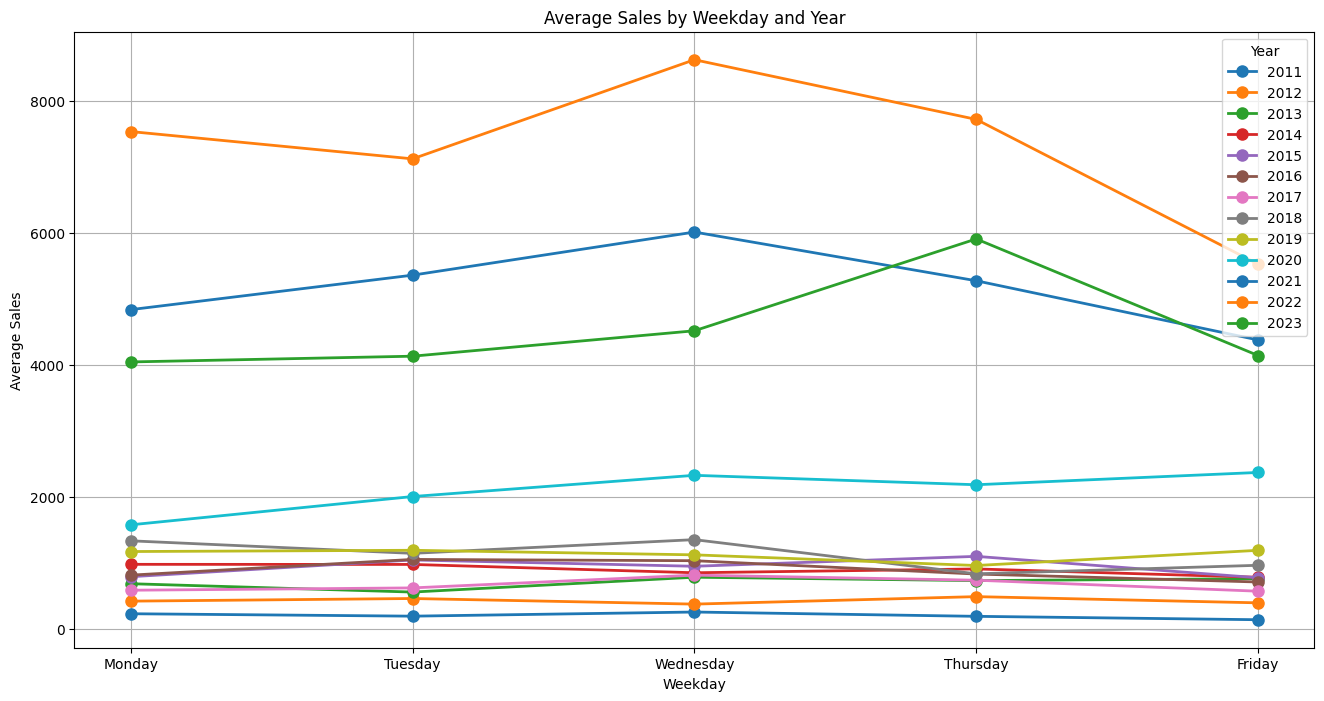

In [ ]:
# Calculate the total daily sales
daily_sales = ffff_data.groupby('date_')['Q'].sum().reset_index()
# Add year, weekday, and weekday name columns
daily_sales['year'] = daily_sales['date_'].dt.year
daily_sales['weekday'] = daily_sales['date_'].dt.weekday
daily_sales['day_of_week'] = daily_sales['date_'].dt.day_name()

# Group by year and weekday, and calculate the average sales
avg_weekday_sales = daily_sales.groupby(['year', 'weekday', 'day_of_week'])['Q'].mean().reset_index()

# Sort by year and weekday
avg_weekday_sales = avg_weekday_sales.sort_values(['year', 'weekday'])
fig, ax = plt.subplots(figsize=(16, 8))

# Plot a line for each year with a unique color
years = avg_weekday_sales['year'].unique()
for year in years:
    year_data = avg_weekday_sales[avg_weekday_sales['year'] == year]
    ax.plot(year_data['day_of_week'], year_data['Q'], marker='o', linestyle='-', linewidth=2, markersize=8, label=str(year))

ax.set_xlabel('Weekday')
ax.set_ylabel('Average Sales')
ax.set_title('Average Sales by Weekday and Year')
ax.legend(title='Year', loc='upper right')
ax.grid(True)
plt.show()

### Decomposition 

In [ ]:
weekly= weekly_df.groupby('date_weekly').sum()['Q']
weekly=weekly.reset_index()
weekly.set_index('date_weekly',inplace=True)
#test_df.index=pd.to_datetime(df.index)
#drop null values
weekly.dropna(inplace=True)
weekly=weekly.reset_index()
#Setting period to 30 as we are interested in the 30 days decomposition 
decomposition = seasonal_decompose(weekly['Q'],model='additive', period=52)
fig = plot_seasonal_decompose(decomposition, dates=weekly['date_weekly'])
fig.show()

<ipython-input-87-2d83d556b5f4>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



#### Seasonality in details

In [ ]:
# Plot the seasonality in details 
decomposition_plot_multi = seasonal_decompose(weekly['Q'],
                                              model='additive',period=52)

In [ ]:
df_season = decomposition_plot_multi.seasonal.to_frame()

,seasonal
0,-6398.010765
1,573.537311
2,3432.053920
3,2429.320528
4,2519.032067


In [ ]:
fig = px.line(df_season, x=df_season.index, y='seasonal', title='Deatiled Seasonality of Total Quantity Sold')
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)',title_x=0.5)
fig.update_traces(line=dict(color=color_palette[8]))  # Set the line color

fig.show()

Since we can detect a seasonality in the dataset, we can try some rolling statistics

In [ ]:
df_season['MA'] = df_season['seasonal'].rolling(3).mean()
df_season.fillna(0, inplace = True)
df_season.head()

,seasonal,MA
0,-6398.010765,0.000000
1,573.537311,0.000000
2,3432.053920,-797.473178
3,2429.320528,2144.970587
4,2519.032067,2793.468838


In [ ]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_season.index, y=df_season['seasonal'],
                    mode='lines',
                    name='Seasonal Sales'))
fig.add_trace(go.Scatter(x=df_season.index, y=df_season['MA'],
                    mode='lines+markers',
                    name='Moving Average'))


fig.show()

### Stationarity 

In [ ]:
weekly.set_index('date_weekly', inplace=True)

#### ADF

In [ ]:
ad_fuller_func(weekly['Q'])


ADF Statistic: -2.542089
p-value: 0.105567
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
Failed to Reject Ho-Time Series is Non-Stationary


#### KPPS

In [ ]:
kpss_func(weekly['Q'])

The test statistic is outside the range of p-values available in the look-up table.
The actual p-value is smaller than the p-value returned.
This might indicate a strong non-stationarity in the time series.


In [ ]:
def test_stationarity(data, category_column, date_column, value_column):
    # Group data by date and item category, then take the mean of the values within each group
    grouped_data = data.groupby([date_column, category_column]).mean().reset_index()
    
    unique_categories = grouped_data[category_column].unique()
    
    for category in unique_categories:
        print(f'Category: {category}')
        
        # Select the time series values for the current category
        category_data = grouped_data[grouped_data[category_column] == category][value_column]
        
        # Apply the ADF test
        print('ADF Test:')
        ad_fuller_func(category_data)
        
        # Apply the KPSS test
        print('\nKPSS Test:')
        kpss_func(category_data)
        
        print('\n' + '-' * 50 + '\n')

test_stationarity(weekly_df, 'Item Category Code', 'date_weekly','Q')


Category: TABLEWARE
ADF Test:
ADF Statistic: -5.175767
p-value: 0.000010
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
Reject Null Hypothesis(Ho)-Time Series is Stationary

KPSS Test:
The test statistic is outside the range of p-values available in the look-up table.
The actual p-value is smaller than the p-value returned.
This might indicate a strong non-stationarity in the time series.

--------------------------------------------------

Category: ACCESSORIE
ADF Test:


<ipython-input-96-e775a980f5d7>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



ADF Statistic: -6.209004
p-value: 0.000000
Critical Values:
	1%: -3.442
	5%: -2.867
	10%: -2.570
Reject Null Hypothesis(Ho)-Time Series is Stationary

KPSS Test:
The test statistic is outside the range of p-values available in the look-up table.
The actual p-value is smaller than the p-value returned.
This might indicate a strong non-stationarity in the time series.

--------------------------------------------------

Category: CERAMIC
ADF Test:
ADF Statistic: -2.555130
p-value: 0.102630
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
Failed to Reject Ho-Time Series is Non-Stationary

KPSS Test:
The test statistic is outside the range of p-values available in the look-up table.
The actual p-value is smaller than the p-value returned.
This might indicate a strong non-stationarity in the time series.

--------------------------------------------------

Category: STORAGE
ADF Test:
ADF Statistic: -7.629036
p-value: 0.000000
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570
Reject

### Autocorrelation

In [ ]:
autocorrelation_fig = plot_autocorrelation(weekly_df["Q"], lags=60, title="Autocorrelation Plot for full time series")
autocorrelation_fig.show()


In an autocorrelation plot, the x-axis represents the lag, while the y-axis shows the autocorrelation values for each lag. The autocorrelation value ranges from -1 to 1, where -1 indicates a strong negative correlation, 0 indicates no correlation, and 1 indicates a strong positive correlation.

The confidence interval line represents the range within which the autocorrelation values would fall if the time series data were purely random. In other words, if the autocorrelation value lies within the confidence interval, it is likely due to chance, and there's no significant correlation between the data points separated by that lag.

When the autocorrelation line crosses the confidence interval line at lag 34, it implies that the correlation between the data points separated by 34 periods is not statistically significant. Beyond lag 34, the autocorrelation values are likely due to chance, and no meaningful relationship exists between the data points separated by those lags.

However, you should also consider the autocorrelation values at lags below 34. If some of these values are outside the confidence interval, it suggests that there is a significant correlation at those lags. 

<ipython-input-53-d474c81c9371>:27: MatplotlibDeprecationWarning:

The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.

<ipython-input-53-d474c81c9371>:36: MatplotlibDeprecationWarning:

The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.



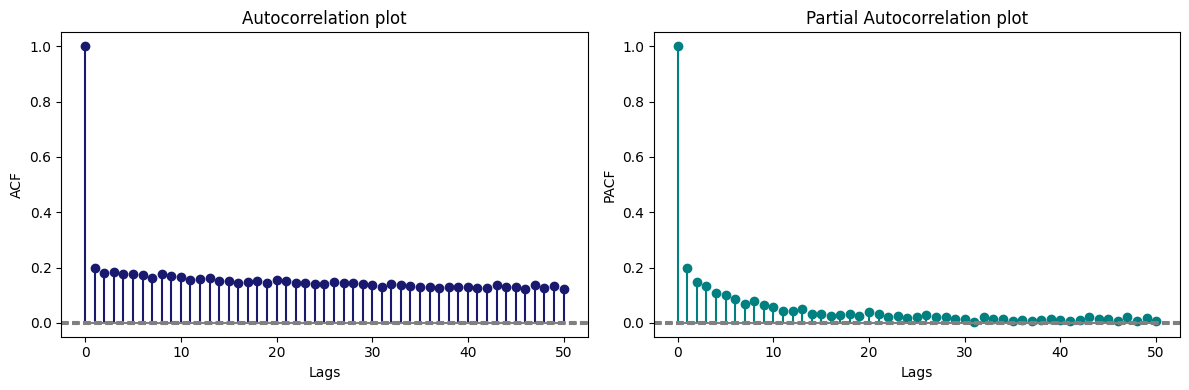

In [ ]:
autocorrelation_plot(weekly_df,50)

## Categorical time series analysis

### Sales plot

In [ ]:

# Group the weekly data by item category code and date, and sum the quantity sold
weekly_sales = weekly_df.groupby(['Item Category Code', 'date_weekly']).sum()['Q']

# Get the unique item category codes
category_codes = weekly_df['Item Category Code'].unique()

# Loop through each item category code and create a separate plot
for category_code in category_codes:
    # Filter the weekly sales data for the current item category code
    category_sales = weekly_sales[category_code]
    
    # Get the x and y values for the line plot
    x = category_sales.reset_index()['date_weekly'].astype(str).values.tolist()
    y = category_sales.reset_index()['Q'].values.tolist()
    
    # Create a line trace for the current item category code
    trace = go.Scatter(x=x, y=y, name='Total Sales')
    
    # Create a new figure for the current item category code and add the line trace
    fig = go.Figure(trace)
    
    # Set the subplot title and axis labels
    fig.update_layout(title=f'Weekly Sales for Item Category Code {category_code}', xaxis_title='Date', title_x=0.5, yaxis_title='Sum of Quantity (Week)')
    fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

    # Show the plot for the current item category code
    fig.show()


<ipython-input-99-1d135278c4d1>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
plot_multiple_skus(weekly_df,"date_weekly","Item Category Code","Q","Daily Quantity sold on 4 randomly chosen categories")

----------------------------------------
ADF Test for: TABLEWARE
ADF Statistic: -2.313241
p-value: 0.167733
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
Failed to Reject Ho - Time Series is Non-Stationary
----------------------------------------
ADF Test for: KIDS
ADF Statistic: -3.206093
p-value: 0.019635
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571
Reject Ho - Time Series is Stationary
----------------------------------------
ADF Test for: ACCESSORIE
ADF Statistic: -5.437757
p-value: 0.000003
Critical Values:
	1%: -3.442
	5%: -2.867
	10%: -2.570
Reject Ho - Time Series is Stationary
----------------------------------------
ADF Test for: STORAGE
ADF Statistic: -2.414093
p-value: 0.137798
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570
Failed to Reject Ho - Time Series is Non-Stationary


In [ ]:
# unique items in 2022
after_2022 = weekly_df[weekly_df['date_weekly'] > '2020-01-01']
category_daily_sales = after_2022.groupby(['Item Category Code', 'date_weekly'], as_index=False)['value'].sum()

# Create a color mapping for the unique categories
unique_categories = category_daily_sales['Item Category Code'].unique()
color_mapping = assign_colors(unique_categories, color_palette)

store_daily_sales_sc = []
for cat in unique_categories:
    current_store_daily_sales = category_daily_sales[(category_daily_sales['Item Category Code'] == cat)]
    store_daily_sales_sc.append(go.Scatter(x=current_store_daily_sales['date_weekly'], y=current_store_daily_sales['value'], name=('Category: %s' % cat), line=dict(color=color_mapping[cat])))

layout = go.Layout(title='Weekly quantity sold by category from 2020 onwards', title_x=0.5, xaxis=dict(title=''), yaxis=dict(title='Quantity'))
fig = go.Figure(data=store_daily_sales_sc, layout=layout)
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_layout(legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5), legend_title="")

fig.show()


In [ ]:

# Filter the data for years 2020 and onwards
after_2022 = weekly_df[weekly_df['date_weekly'] > '2020-01-01']

# Group the data by Item Category Code and Year
after_2022['year'] = pd.DatetimeIndex(after_2022['date_weekly']).year
category_yearly_sales = after_2022.groupby(['Item Category Code', 'year'], as_index=False)['value'].sum()

# Create a color mapping for the unique categories
unique_categories = category_yearly_sales['Item Category Code'].unique()
color_mapping = assign_colors(unique_categories, color_palette)

# Create the bar chart
store_yearly_sales_bars = []
for cat in unique_categories:
    current_store_yearly_sales = category_yearly_sales[(category_yearly_sales['Item Category Code'] == cat)]
    store_yearly_sales_bars.append(go.Bar(x=current_store_yearly_sales['year'], y=current_store_yearly_sales['value'], name=('Category: %s' % cat), marker=dict(color=color_mapping[cat])))

layout = go.Layout(title='Yearly quantity sold by category from 2020 onwards', title_x=0.5, xaxis=dict(title=''), yaxis=dict(title='Quantity'))
fig = go.Figure(data=store_yearly_sales_bars, layout=layout)
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_layout(legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5), legend_title="")

fig.show()


<ipython-input-167-e67aa0773257>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Decomposition 

In [ ]:
plot_seasonal_decompose_sku_category(weekly_df,"Item Category Code",period=52)

### Stationarity 

In [ ]:
weekly_df=weekly_df.reset_index()

In [ ]:
category_stationarity_df=save_stationarity_results(weekly_df,"date_weekly","Item Category Code","Q")

<ipython-input-48-df340b1af9f1>:27: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


<ipython-input-48-df340b1af9f1>:27: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


<ipython-input-48-df340b1af9f1>:27: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/

In [ ]:
category_stationarity_df

,Item Category Code,ADF_score,p_value_ADF,KPSS_score,p_value_KPSS,stationarity
0,BAGS,-11.927749,4.861875e-22,0.619905,0.020827,Non-Stationary
1,KIDS ROOM,-16.193550,4.146732e-29,0.098774,0.100000,Stationary
2,KIDS,-5.465722,2.461460e-06,3.427861,0.010000,Non-Stationary
3,STORAGE,-57.222232,0.000000e+00,0.162886,0.100000,Stationary
4,ACCESSORIE,-6.448084,1.547831e-08,2.341187,0.010000,Non-Stationary
5,HOME,-4.990101,2.321640e-05,0.758536,0.010000,Non-Stationary
6,CERAMIC,-10.597434,6.296571e-19,2.855922,0.010000,Non-Stationary
7,TABLEWARE,-22.196630,0.000000e+00,1.125391,0.010000,Non-Stationary
8,KITCHEN,-6.293732,3.547446e-08,9.914350,0.010000,Non-Stationary
9,KIDS TABLE,-13.314605,6.641642e-25,7.619114,0.010000,Non-Stationary


In [ ]:
plot_weekly_stationarity_categories=category_stationarity_df.groupby("stationarity")["Item Category Code"].count()

In [ ]:
plot_weekly_stationarity_categories=plot_weekly_stationarity_categories.reset_index()

In [ ]:
plot_weekly_stationarity_categories

,stationarity,Item Category Code
0,Non-Stationary,8
1,Stationary,2


In [ ]:

# Select two colors from the color palette
colors = [color_palette[0], color_palette[1]]

# Map the unique values in the 'stationarity' column to the selected colors
unique_stationarity_values = plot_weekly_stationarity_categories['stationarity'].unique()
color_mapping = dict(zip(unique_stationarity_values, colors))

# Create the bar chart with the custom color palette
fig = px.bar(plot_weekly_stationarity_categories, x='stationarity', y='Item Category Code', color='stationarity', color_discrete_map=color_mapping,
             hover_data=['Item Category Code', 'stationarity'])

fig.update_traces(
    hovertemplate="<b>Stationarity:</b> %{x}<br><b>Item Category Code:</b> %{y}<br><b>Count:</b> %{customdata[0]}",
    textfont=dict(size=14, color='black', family='Arial Black')
)

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_layout(yaxis_title="Count")
fig.update_layout(title_text="Distribution of stationarity results on Categories based on ADF test", title_x=0.5)
fig.show()


### Autocorrelation

<ipython-input-55-31e4def0a3fe>:21: MatplotlibDeprecationWarning:

The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.

<ipython-input-55-31e4def0a3fe>:30: MatplotlibDeprecationWarning:

The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.



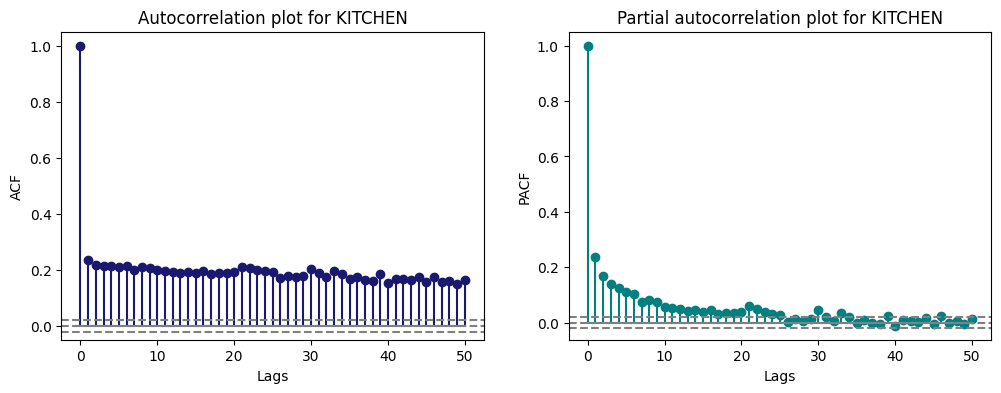

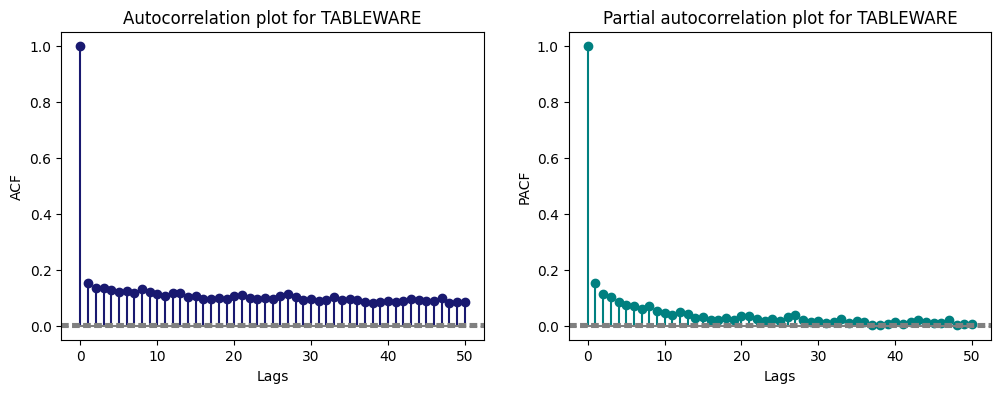

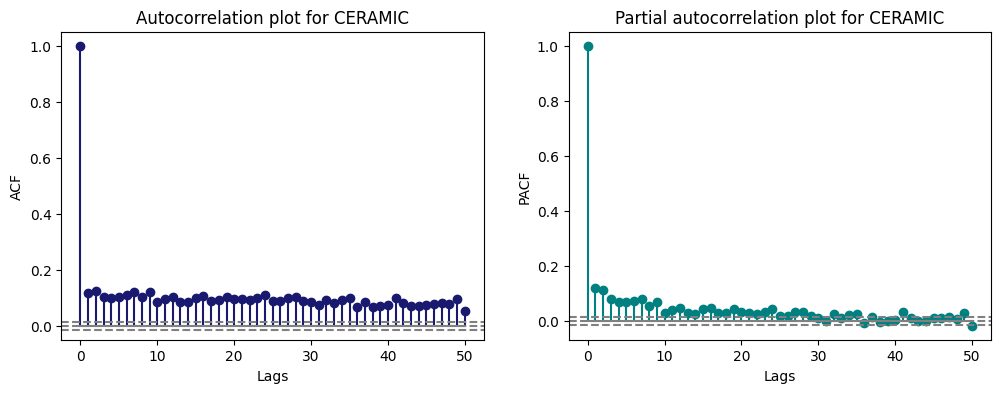

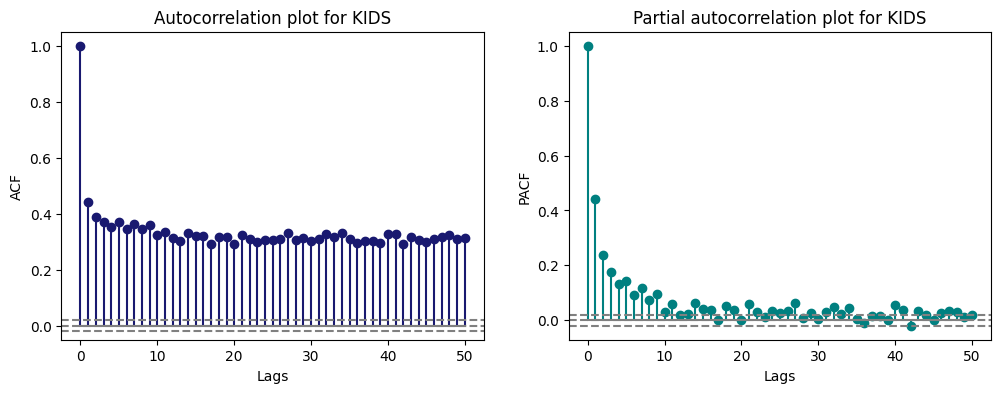

In [ ]:
autocorrelation_plot_by_category(weekly_df,"Item Category Code",lags=50)

In [ ]:
autocorrelation_plot_by_sku(weekly_df,"Item Category Code")

## SKU-level

### Number of observations by item number

In [ ]:
weekly_df=weekly_df.reset_index()

In [ ]:
observations_by_item_number=pd.pivot_table(weekly_df, index='_ItemNumber', values=['date_weekly'], aggfunc=lambda x: len(x.unique()))

In [ ]:
# Sort the pivot table in descending order
sorted_observations = observations_by_item_number.sort_values(by='date_weekly', ascending=False).reset_index()

# Create a bar chart using plotly express
fig = px.bar(sorted_observations, x='_ItemNumber', y='date_weekly', title='Number of Weekly Observations by Unique Item Number',
             color_discrete_sequence=[color_palette[8]])

# Customize the chart layout if needed
fig.update_layout(xaxis_title='Item Number', yaxis_title='Count of Weekly Observations',title_x=0.5)
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
# Show the chart
fig.show()


In [ ]:
sorted_observations

,_ItemNumber,date_weekly
0,MELCU-II,615
1,MELCU-B,611
2,MELCU-DMI,584
3,MELCU-LMAGT,561
4,WRBIR-SXC,537
...,...,...
229,POPLA-EMBR,13
230,BGPLA-EMBR,13
231,POPLA-HAPPY,12
232,CDCAK-TWISTG,11


In [ ]:
observations_by_item_number[observations_by_item_number["date_weekly"]<50]

,date_weekly
_ItemNumber,
BGPLA-EMBR,13
BGPLA-HAPPY,14
BGPLA-POWER,13
BGRFA-FLOI,18
BGRFA-LCHNB,18
BSHOU-3ZDIN,37
BSHOU-3ZPAB,19
BSHOU-3ZPAI,19
BSHOU-3ZVAY,18


#### SS23

In [ ]:
ss23=weekly_df[weekly_df["BDLRI Origin"]=="SS23"]

In [ ]:
observations_by_item_number_2023=pd.pivot_table(ss23, index='_ItemNumber', values=['date_weekly'], aggfunc=lambda x: len(x.unique()))

In [ ]:
observations_by_item_number_2023=observations_by_item_number_2023.reset_index()
len(observations_by_item_number_2023._ItemNumber.unique())

41

In [ ]:
tt=ss23[ss23["date_weekly"]<'2022-10-01']
len(tt.date_weekly.unique())

59

### Sales by item number 

In [ ]:
weekly_df=weekly_df.reset_index()

In [ ]:
sales_by_item_number=pd.pivot_table(weekly_df, index='_ItemNumber', values=['Q'], aggfunc=lambda x: sum(x.unique()))

In [ ]:
sales_by_item_number

,Q
_ItemNumber,
BGLEA-RVIL,581.0
BGLEA-RVIM,419.0
BGLEA-VITL,1696.0
BGLEA-VITM,1427.0
BGPLA-EMBR,366.0
...,...
SHSPO-4ZSGOL,1699.0
THERMO-BIBI,715.0
THERMO-BIDMI,1400.0


In [ ]:
# Sort the pivot table in descending order
sorted_observations = sales_by_item_number.sort_values(by='Q', ascending=False).reset_index()

# Create a bar chart using plotly express
fig = px.bar(sorted_observations, x='_ItemNumber', y='Q', title='Total sales by Unique Item Number',
             color_discrete_sequence=[color_palette[8]])

# Customize the chart layout if needed
fig.update_layout(xaxis_title='', yaxis_title='Count of Sales',title_x=0.5)
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
# Show the chart
fig.show()


In [ ]:
plot_multiple_skus(weekly_df,"date_weekly","_ItemNumber","Q","Weekly Quantity sold on 4 randomly chosen SKUs")

----------------------------------------
ADF Test for: THERMO-BIP
ADF Statistic: -3.639452
p-value: 0.005050
Critical Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613
Reject Ho - Time Series is Stationary
----------------------------------------
ADF Test for: MELCU-ALPLB2
ADF Statistic: -5.870795
p-value: 0.000000
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606
Reject Ho - Time Series is Stationary
----------------------------------------
ADF Test for: CEOVE-LSI
ADF Statistic: -2.334175
p-value: 0.161183
Critical Values:
	1%: -3.516
	5%: -2.899
	10%: -2.587
Failed to Reject Ho - Time Series is Non-Stationary
----------------------------------------
ADF Test for: MELBW-SALCO
ADF Statistic: -3.064777
p-value: 0.029272
Critical Values:
	1%: -3.485
	5%: -2.885
	10%: -2.579
Reject Ho - Time Series is Stationary


In [ ]:
# takes df, date_col, sku_col, sales_col as input

plot_multiple_skus(ffff_data,"date_","_ItemNumber","Q","Daily Quantity sold on original data")

----------------------------------------
ADF Test for: MELCU-ALPGB
ADF Statistic: -4.780306
p-value: 0.000059
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
Reject Ho - Time Series is Stationary
----------------------------------------
ADF Test for: MELCU-B
ADF Statistic: -5.658739
p-value: 0.000001
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject Ho - Time Series is Stationary
----------------------------------------
ADF Test for: CEOVE-LDP
ADF Statistic: -10.221908
p-value: 0.000000
Critical Values:
	1%: -3.532
	5%: -2.906
	10%: -2.590
Reject Ho - Time Series is Stationary
----------------------------------------
ADF Test for: MELCU-ALPLI
ADF Statistic: -4.356383
p-value: 0.000354
Critical Values:
	1%: -3.455
	5%: -2.873
	10%: -2.573
Reject Ho - Time Series is Stationary


### Decomposition

In [ ]:
plot_seasonal_decompose_sku_category(weekly_df,"_ItemNumber",period=52)

### Stationarity

In [ ]:
weekly_stationarity_df=save_stationarity_results(weekly_df,"date_weekly","_ItemNumber","Q")

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


<ipython-input-48-df340b1af9f1>:27: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


<ipython-input-48-df340b1af9f1>:27: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
loo

In [ ]:
weekly_stationarity_df

,_ItemNumber,ADF_score,p_value_ADF,KPSS_score,p_value_KPSS,stationarity
0,BGLEA-RVIL,-6.706486,3.773758e-09,0.092685,0.1,Stationary
1,BGLEA-RVIM,-7.215009,2.184690e-10,0.274465,0.1,Stationary
2,BGLEA-VITL,-6.699314,3.925927e-09,0.170456,0.1,Stationary
3,BGLEA-VITM,-24.409197,0.000000e+00,0.086843,0.1,Stationary
4,BSANI-ELEPH,-16.193550,4.146732e-29,0.098774,0.1,Stationary
...,...,...,...,...,...,...
229,PLBOT-CAR,-9.923289,2.951886e-17,0.118769,0.1,Stationary
230,POPLA-EMBR,-6.209045,5.565493e-08,0.222361,0.1,Stationary
231,POPLA-HAPPY,-5.666108,9.144008e-07,0.102562,0.1,Stationary
232,POPLA-POWER,-7.337303,1.088034e-10,0.198973,0.1,Stationary


In [ ]:

weekly_stationarity_df[weekly_stationarity_df["_ItemNumber"]=="BSRAT-20HEAR"]

,_ItemNumber,ADF_score,p_value_ADF,KPSS_score,p_value_KPSS,stationarity


In [ ]:
plot_weekly_stationarity=weekly_stationarity_df.groupby("stationarity")["_ItemNumber"].count()
plot_weekly_stationarity=plot_weekly_stationarity.reset_index()

In [ ]:

# Select two colors from the color palette
colors = [color_palette[0], color_palette[1]]

# Map the unique values in the 'stationarity' column to the selected colors
unique_stationarity_values = plot_weekly_stationarity['stationarity'].unique()
color_mapping = dict(zip(unique_stationarity_values, colors))

# Create the bar chart with the custom color palette
fig = px.bar(plot_weekly_stationarity, x='stationarity', y='_ItemNumber', color='stationarity', color_discrete_map=color_mapping,
             hover_data=['_ItemNumber', 'stationarity'])

fig.update_traces(
    hovertemplate="<b>Stationarity:</b> %{x}<br><b>_ItemNumber:</b> %{y}<br><b>Count:</b> %{customdata[0]}",
    textfont=dict(size=14, color='black', family='Arial Black')
)

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_layout(yaxis_title="Count")
fig.update_layout(title_text="Distribution of stationarity results on SKUs based on ADF test", title_x=0.5)
fig.show()

In [ ]:
#plot_weekly_stationarity = plot_weekly_stationarity.reset_index()
fig = px.bar(plot_weekly_stationarity, x='stationarity', y='_ItemNumber')

fig.update_traces(
    texttemplate='%{text:.2s}', text=plot_weekly_stationarity["_ItemNumber"],
    textposition='outside',
    textfont=dict(size=14, color='black', family='Arial Black')
)

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_layout(yaxis_title="Count")
fig.update_layout(title_text="Distribution of stationarity results on unique SKUs", title_x=0.5)
fig.show()


In [ ]:
plot_non_stationary_skus(weekly_df,"date_weekly","_ItemNumber","Q","Example of four non-stationary SKUs")

----------------------------------------
ADF Test for: CEJUG-FLOW
ADF Statistic: -1.133576
p-value: 0.701498
Critical Values:
	1%: -4.012
	5%: -3.104
	10%: -2.691
Failed to Reject Ho - Time Series is Non-Stationary
----------------------------------------
ADF Test for: THERMO-BIBI
ADF Statistic: -6.917471
p-value: 0.000000
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583
Reject Ho - Time Series is Stationary
----------------------------------------
ADF Test for: CELPL-EMY
ADF Statistic: -3.904292
p-value: 0.002003
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606
Reject Ho - Time Series is Stationary
----------------------------------------
ADF Test for: MELCU-LWIFL
ADF Statistic: -2.438449
p-value: 0.131177
Critical Values:
	1%: -3.548
	5%: -2.913
	10%: -2.594
Failed to Reject Ho - Time Series is Non-Stationary
----------------------------------------
ADF Test for: CEPIE-LMI
ADF Statistic: -6.299245
p-value: 0.000000
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570
Rejec

In [ ]:
# takes df, date_col, sku_col, sales_col as input

plot_non_stationary_skus(ffff_data,"date_","_ItemNumber","Q","Non-Stationary time series")

----------------------------------------
ADF Test for: MELCU-6ZSFUNI
ADF Statistic: -3.102648
p-value: 0.026358
Critical Values:
	1%: -3.474
	5%: -2.881
	10%: -2.577
Reject Ho - Time Series is Stationary
----------------------------------------
ADF Test for: BGLEA-VITM
ADF Statistic: -7.600094
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
Reject Ho - Time Series is Stationary
----------------------------------------
ADF Test for: MELCU-SURU
ADF Statistic: -2.790554
p-value: 0.059636
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Failed to Reject Ho - Time Series is Non-Stationary
----------------------------------------
ADF Test for: MELCU-ALPNI
ADF Statistic: -9.586122
p-value: 0.000000
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Reject Ho - Time Series is Stationary
----------------------------------------
ADF Test for: BGLEA-RVIM
ADF Statistic: -5.177638
p-value: 0.000010
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
Reject Ho - Tim

### Autocorrelation

In [ ]:
autocorrelation_plot_by_sku(weekly_df,"_ItemNumber")

<ipython-input-55-31e4def0a3fe>:21: MatplotlibDeprecationWarning:

The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.

<ipython-input-55-31e4def0a3fe>:30: MatplotlibDeprecationWarning:

The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.



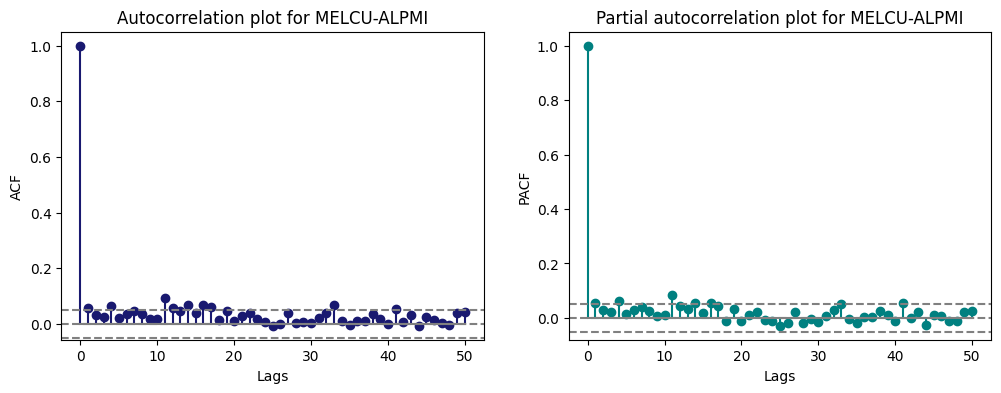

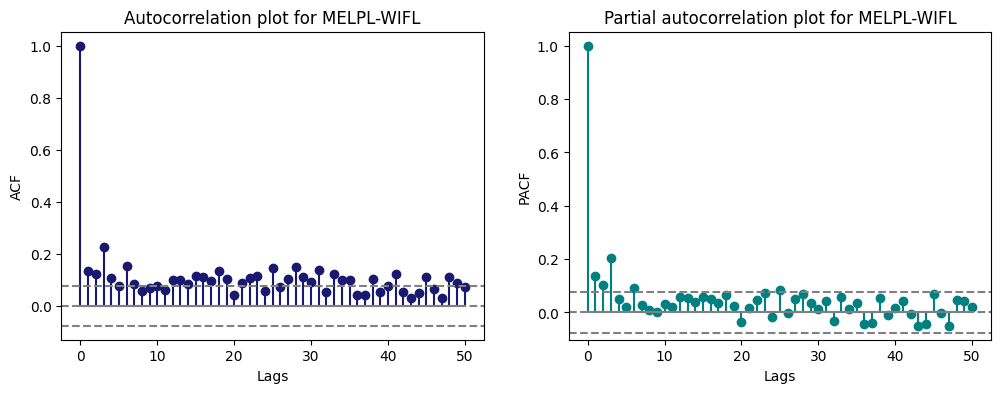

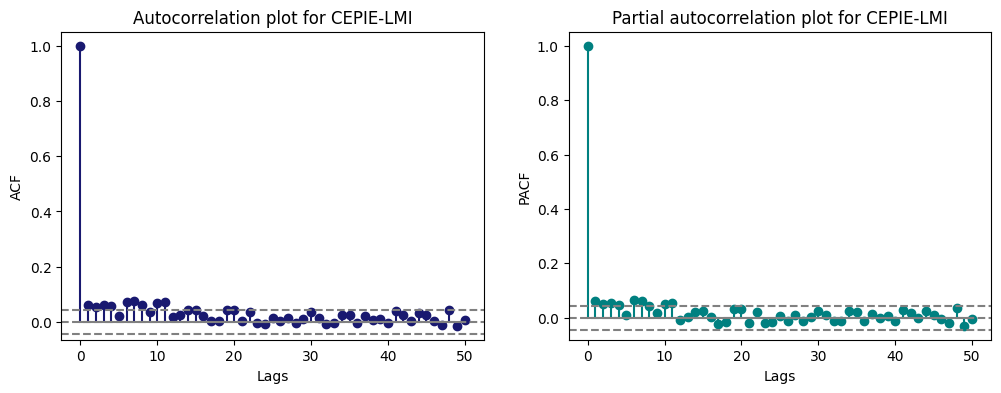

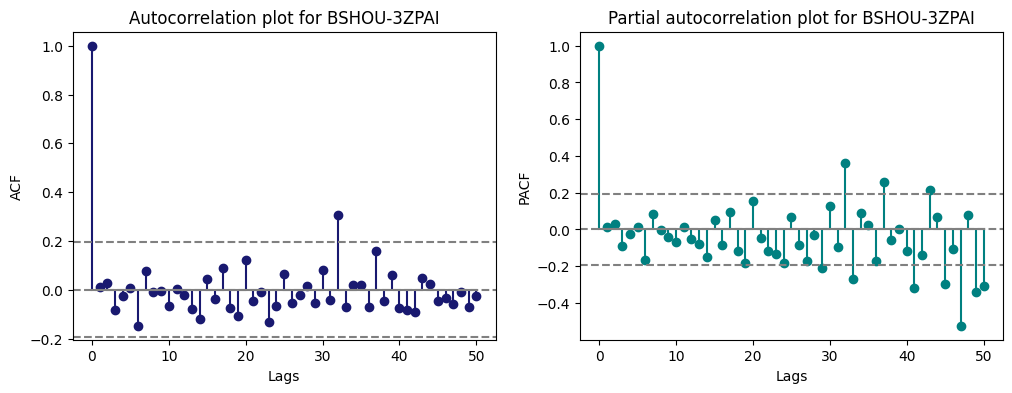

In [ ]:
autocorrelation_plot_by_category(weekly_df,"_ItemNumber",lags=50)